In [46]:
"""
@author: anahí
pip install seaborn
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data
"""
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from google.colab import files
import warnings

warnings.filterwarnings('ignore')


In [38]:
files.upload()

Saving penguins_size.csv to penguins_size (1).csv


{'penguins_size.csv': b'species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex\nAdelie,Torgersen,39.1,18.7,181,3750,MALE\nAdelie,Torgersen,39.5,17.4,186,3800,FEMALE\nAdelie,Torgersen,40.3,18,195,3250,FEMALE\nAdelie,Torgersen,NA,NA,NA,NA,NA\nAdelie,Torgersen,36.7,19.3,193,3450,FEMALE\nAdelie,Torgersen,39.3,20.6,190,3650,MALE\nAdelie,Torgersen,38.9,17.8,181,3625,FEMALE\nAdelie,Torgersen,39.2,19.6,195,4675,MALE\nAdelie,Torgersen,34.1,18.1,193,3475,NA\nAdelie,Torgersen,42,20.2,190,4250,NA\nAdelie,Torgersen,37.8,17.1,186,3300,NA\nAdelie,Torgersen,37.8,17.3,180,3700,NA\nAdelie,Torgersen,41.1,17.6,182,3200,FEMALE\nAdelie,Torgersen,38.6,21.2,191,3800,MALE\nAdelie,Torgersen,34.6,21.1,198,4400,MALE\nAdelie,Torgersen,36.6,17.8,185,3700,FEMALE\nAdelie,Torgersen,38.7,19,195,3450,FEMALE\nAdelie,Torgersen,42.5,20.7,197,4500,MALE\nAdelie,Torgersen,34.4,18.4,184,3325,FEMALE\nAdelie,Torgersen,46,21.5,194,4200,MALE\nAdelie,Biscoe,37.8,18.3,174,3400,FEMALE\nAdelie,Biscoe,37.7,18

In [72]:
penguins = pd.read_csv("penguins_size.csv")

print(penguins.shape)
penguins.head()

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [41]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


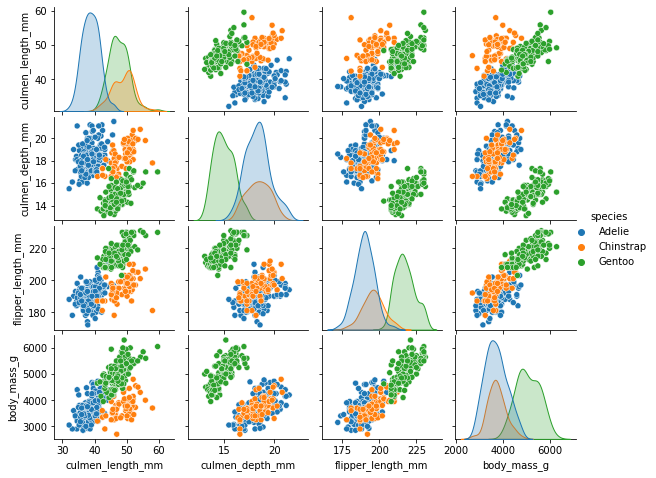

In [42]:
pairplot_figure = sns.pairplot(penguins, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)


In [73]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

penguins.dropna(subset=['sex'], inplace=True)
print(penguins.shape)
penguins.info()

(334, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [74]:
penguins['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [75]:
penguins['sex'].where(penguins['sex']!='.', 'FEMALE', inplace=True)


In [76]:
penguins['sex'].value_counts()

MALE      168
FEMALE    166
Name: sex, dtype: int64

In [77]:
y=penguins.pop('species')
X=pd.get_dummies(penguins, prefix_sep='-', dummy_na=False)
print(X.shape)
X.head(10)

(334, 9)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island-Biscoe,island-Dream,island-Torgersen,sex-FEMALE,sex-MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
6,38.9,17.8,181.0,3625.0,0,0,1,1,0
7,39.2,19.6,195.0,4675.0,0,0,1,0,1
12,41.1,17.6,182.0,3200.0,0,0,1,1,0
13,38.6,21.2,191.0,3800.0,0,0,1,0,1
14,34.6,21.1,198.0,4400.0,0,0,1,0,1


In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   island-Biscoe      334 non-null    uint8  
 5   island-Dream       334 non-null    uint8  
 6   island-Torgersen   334 non-null    uint8  
 7   sex-FEMALE         334 non-null    uint8  
 8   sex-MALE           334 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 14.7 KB


In [80]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [81]:
le=LabelEncoder()
y=le.fit_transform(y)

In [82]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16, stratify=y)

arbol=DecisionTreeClassifier(random_state = 16)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=16)

[0.37638845 0.00948141 0.52561559 0.         0.         0.06513329
 0.         0.         0.00835045 0.01503081]


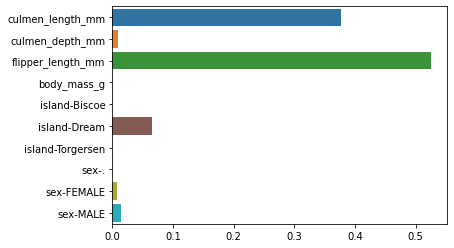

In [33]:
print(arbol.feature_importances_)
sns.barplot(y = X_train.columns, x = arbol.feature_importances_)

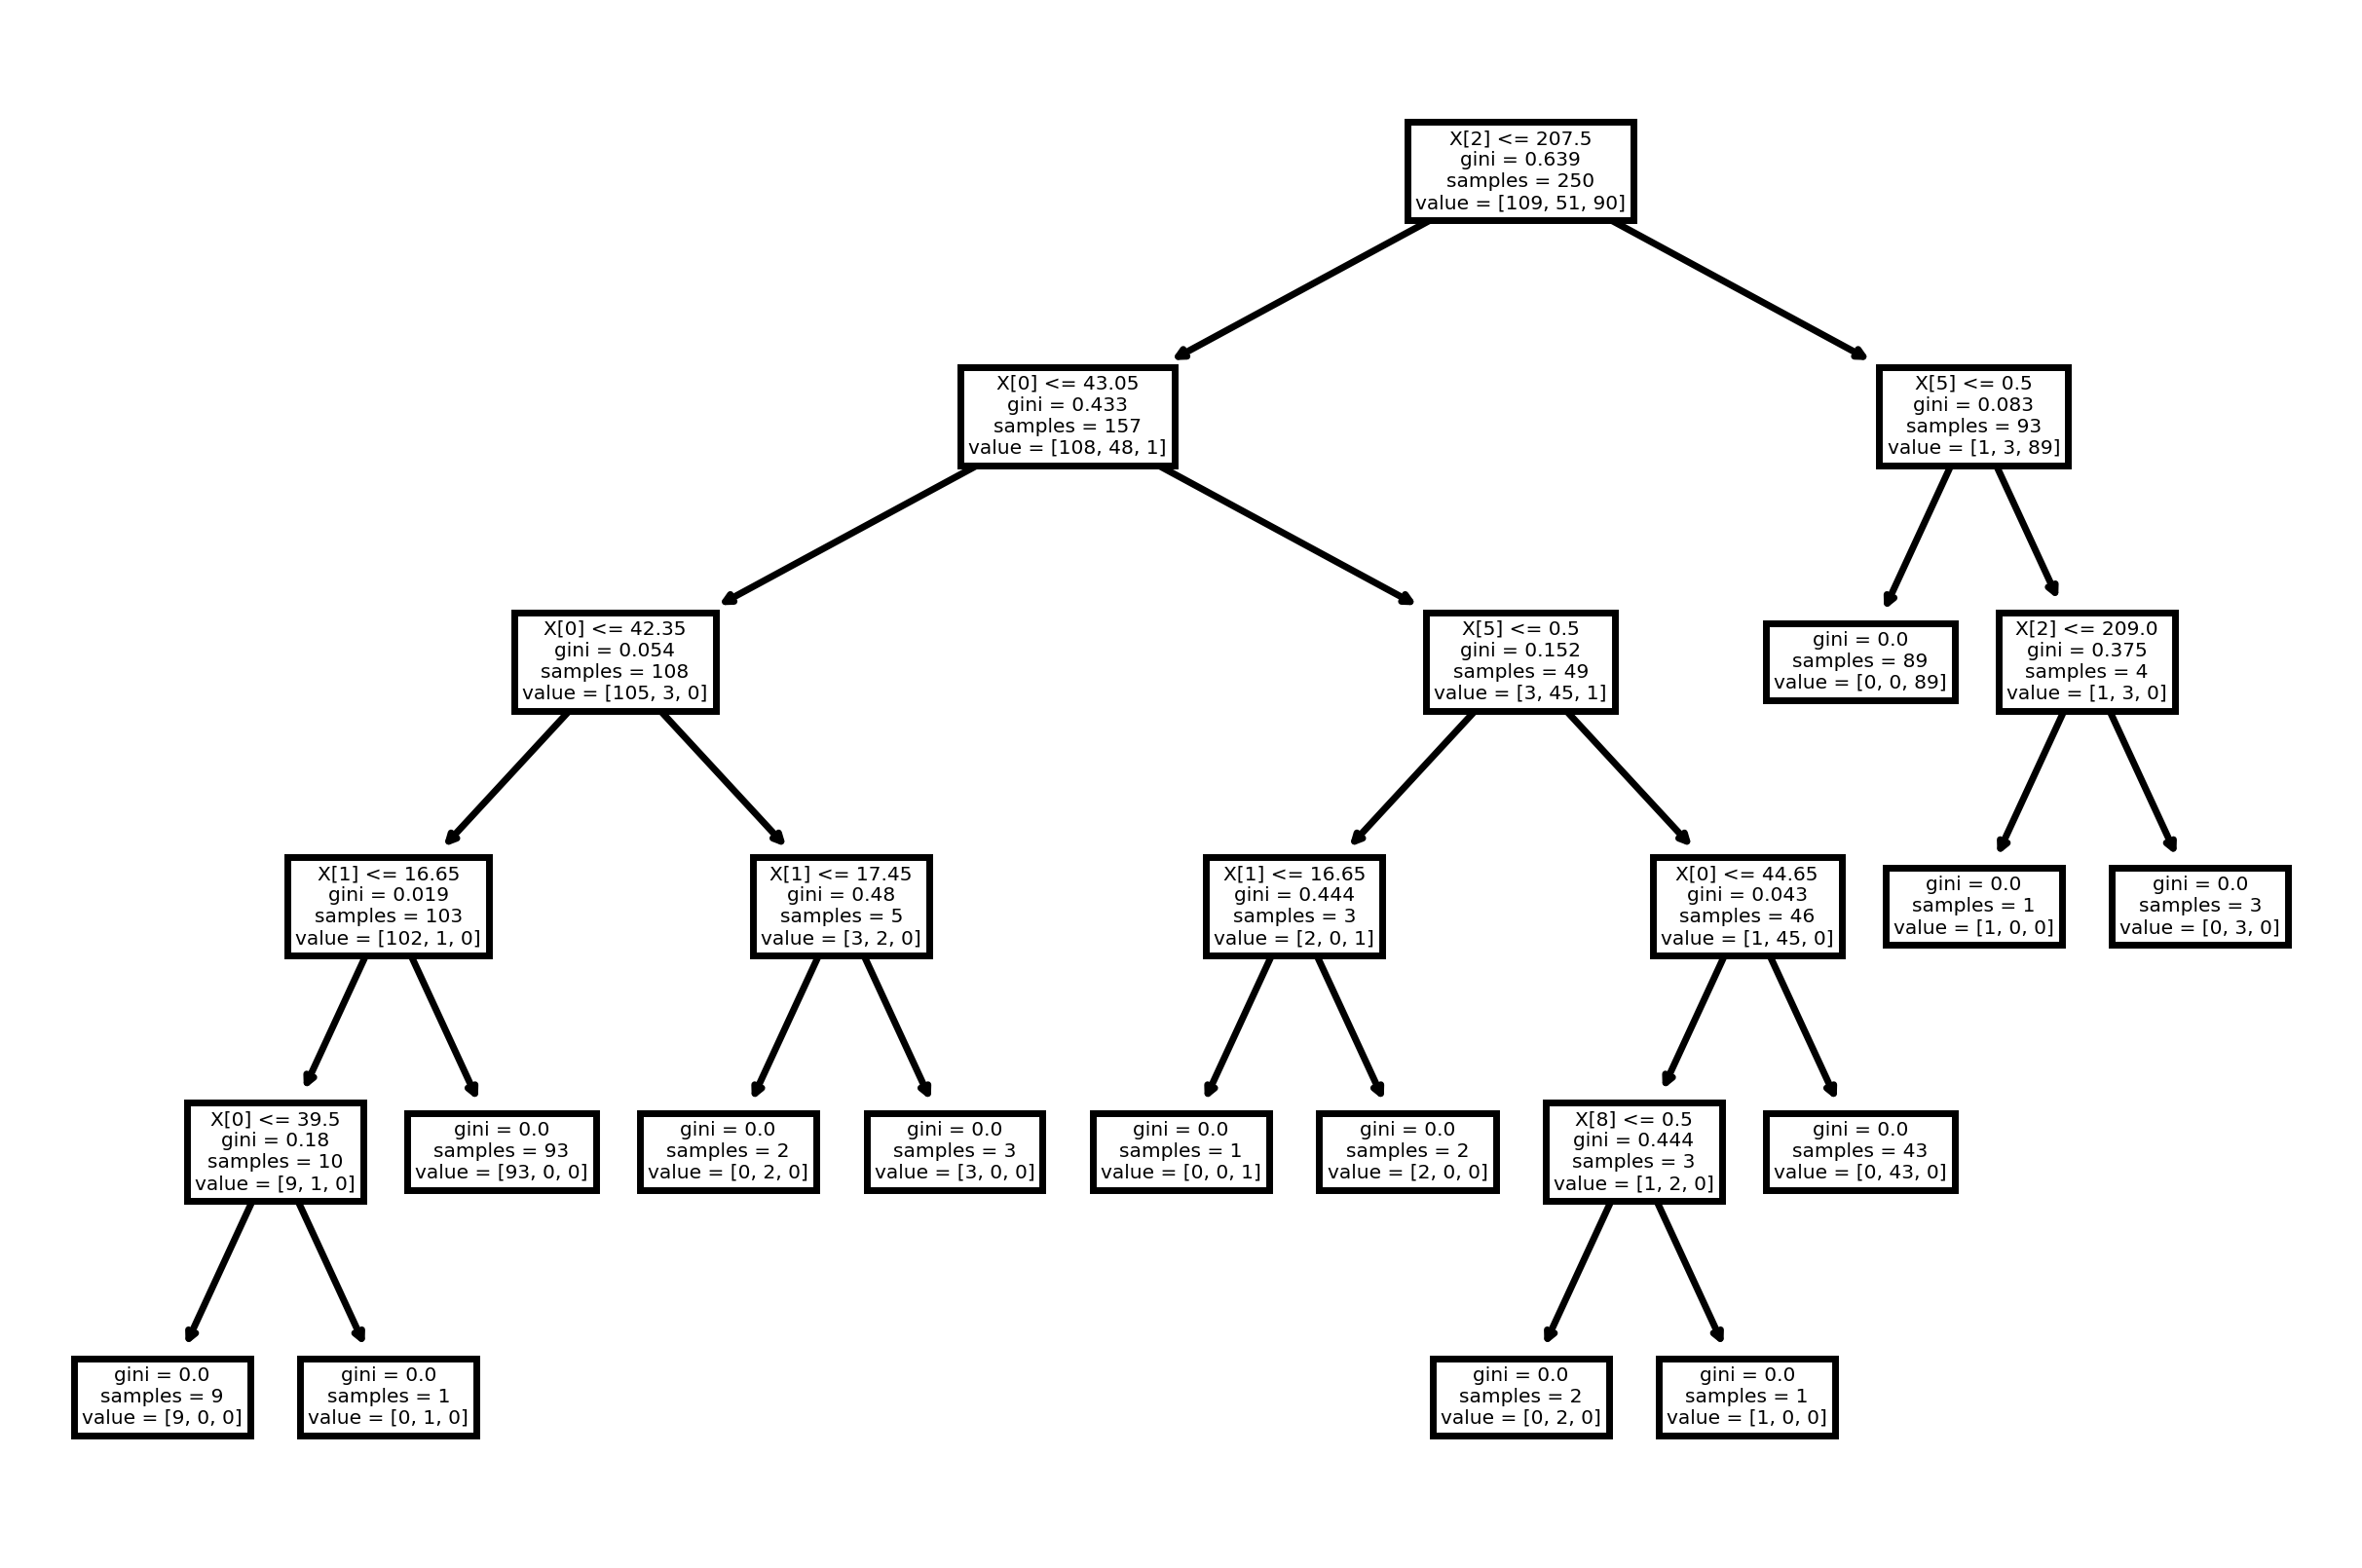

In [84]:
plt.figure(dpi=500)
plot_tree(arbol)
plt.show()
plt.close()

In [85]:
y_pred = arbol.predict(X_test)
print('Score train: ', arbol.score(X_train, y_train))
print('Score test:  ', arbol.score(X_test, y_test))

Score train:  1.0
Score test:   0.9880952380952381


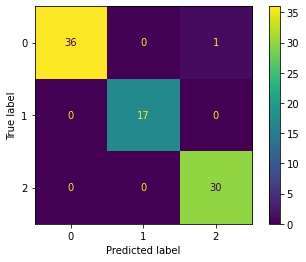

In [86]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()